In [81]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
date=["%.2d" % i for i in range(1,31)]
date
date31=["%.2d" % i for i in range(1,32)]
date31

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

In [6]:
urls=[]
for d in date:
    url=f"https://www.nytimes.com/issue/todayspaper/2019/04/{d}/todays-new-york-times"
    urls.append(url)
for d in date31:
    url=f"https://www.nytimes.com/issue/todayspaper/2019/05/{d}/todays-new-york-times"
    urls.append(url)
for d in date:
    url=f"https://www.nytimes.com/issue/todayspaper/2019/06/{d}/todays-new-york-times"
    urls.append(url)
urls

['https://www.nytimes.com/issue/todayspaper/2019/04/01/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/02/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/03/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/04/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/05/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/06/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/07/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/08/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/09/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/10/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/11/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/12/todays-new-york-times',
 'https://www.nytimes.com/issue/todayspaper/2019/04/

In [9]:
titles=[]
news_link=[]
date=[]
for url in urls:
    response = requests.get(url)
    doc = BeautifulSoup(response.text)
    try:
        front_page=doc.find('section',attrs='css-u82chm ebkl1p30').find_all('h2')[2:-2]
        for page in front_page:
            titles.append(page.string)
            date.append(url)
            try:
                news_link.append(page.find('a').attrs['href'])
            except:
                news_link.append(page.find_parent('a').attrs['href'])
    except:
        titles.append(None)
        news_link.append(None)


In [10]:
len(titles)

1498

In [11]:
len(date)

1498

In [12]:
NYT_FP = pd.DataFrame({'date' : date,'link' : news_link,'titles' : titles })

In [13]:
NYT_FP

,date,link,titles
0,https://www.nytimes.com/issue/todayspaper/2019...,/2019/04/01/health/sacklers-oxycontin-lawsuits...,Lawsuits Lay Bare Sackler Family’s Role in Opi...
1,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/us/midwest-floods-levees.html,‘Breaches Everywhere’: Flooding Bursts Midwest...
2,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/nyregion/budget-new-york-congestio...,New York State Budget Deal Brings Congestion P...
3,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/world/africa/russia-military-afric...,Russia’s Military Mission Creep Advances to a ...
4,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/us/politics/joe-biden-flores.html,Joe Biden Scrambles to Stem Crisis After Lucy ...
5,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/sports/avenatti-nike-trump-cases.html,Michael Avenatti’s Biggest Case Yet: His Own
6,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/world/europe/michou-france-paris-m...,"The ‘Blue Prince of Montmartre,’ at 87, Still ..."
7,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/world/europe/italian-minister-pans...,Italian Minister Pans Hit Song by an Immigrant...
8,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/us/politics/elizabeth-warren-fundr...,Elizabeth Warren Loses Finance Director as She...
9,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/30/us/politics/matt-gaetz-trump.html,Matt Gaetz Is a Congressman Liberals Love to L...


In [16]:
NYT_FP['news_date']=NYT_FP.date.str.extract(r'/(2019/0\d/\d\d)')

In [17]:
NYT_FP['news_date']

0       2019/04/01
1       2019/04/01
2       2019/04/01
3       2019/04/01
4       2019/04/01
5       2019/04/01
6       2019/04/01
7       2019/04/01
8       2019/04/01
9       2019/04/01
10      2019/04/01
11      2019/04/01
12      2019/04/01
13      2019/04/01
14      2019/04/01
15      2019/04/01
16      2019/04/01
17      2019/04/02
18      2019/04/02
19      2019/04/02
20      2019/04/02
21      2019/04/02
22      2019/04/02
23      2019/04/02
24      2019/04/02
25      2019/04/02
26      2019/04/02
27      2019/04/02
28      2019/04/02
29      2019/04/02
           ...    
1468    2019/06/29
1469    2019/06/29
1470    2019/06/29
1471    2019/06/29
1472    2019/06/29
1473    2019/06/29
1474    2019/06/29
1475    2019/06/29
1476    2019/06/29
1477    2019/06/29
1478    2019/06/29
1479    2019/06/29
1480    2019/06/29
1481    2019/06/29
1482    2019/06/30
1483    2019/06/30
1484    2019/06/30
1485    2019/06/30
1486    2019/06/30
1487    2019/06/30
1488    2019/06/30
1489    2019

In [18]:
NYT_FP.head()

,date,link,titles,news_date
0,https://www.nytimes.com/issue/todayspaper/2019...,/2019/04/01/health/sacklers-oxycontin-lawsuits...,Lawsuits Lay Bare Sackler Family’s Role in Opi...,2019/04/01
1,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/us/midwest-floods-levees.html,‘Breaches Everywhere’: Flooding Bursts Midwest...,2019/04/01
2,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/nyregion/budget-new-york-congestio...,New York State Budget Deal Brings Congestion P...,2019/04/01
3,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/world/africa/russia-military-afric...,Russia’s Military Mission Creep Advances to a ...,2019/04/01
4,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/us/politics/joe-biden-flores.html,Joe Biden Scrambles to Stem Crisis After Lucy ...,2019/04/01


In [19]:
NYT_FP['category']=NYT_FP.link.str.extract(r'/2019/\d\d/\d\d/(\w+?)/')

In [20]:
NYT_FP['category']

0           health
1               us
2         nyregion
3            world
4               us
5           sports
6            world
7            world
8               us
9               us
10        nyregion
11        business
12        business
13      obituaries
14            arts
15          sports
16          sports
17        business
18           world
19              us
20           world
21      technology
22        nyregion
23           world
24           world
25              us
26              us
27              us
28              us
29           world
           ...    
1468            us
1469            us
1470        health
1471         world
1472        sports
1473      nyregion
1474      nyregion
1475            us
1476            us
1477         world
1478      business
1479      business
1480        sports
1481        movies
1482         world
1483            us
1484            us
1485         world
1486      business
1487         world
1488         world
1489        

In [21]:
NYT_FP.head()

,date,link,titles,news_date,category
0,https://www.nytimes.com/issue/todayspaper/2019...,/2019/04/01/health/sacklers-oxycontin-lawsuits...,Lawsuits Lay Bare Sackler Family’s Role in Opi...,2019/04/01,health
1,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/us/midwest-floods-levees.html,‘Breaches Everywhere’: Flooding Bursts Midwest...,2019/04/01,us
2,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/nyregion/budget-new-york-congestio...,New York State Budget Deal Brings Congestion P...,2019/04/01,nyregion
3,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/world/africa/russia-military-afric...,Russia’s Military Mission Creep Advances to a ...,2019/04/01,world
4,https://www.nytimes.com/issue/todayspaper/2019...,/2019/03/31/us/politics/joe-biden-flores.html,Joe Biden Scrambles to Stem Crisis After Lucy ...,2019/04/01,us


In [22]:
NYT_FP.to_csv('NYT2019040506FP.csv',index=False)

In [23]:
NYT_FP_cleaned=NYT_FP.drop('link',axis=1,inplace=True)

In [24]:
NYT_FP.drop('date',axis=1,inplace=True)

In [25]:
NYT_FP.to_csv('NYT2019040506FP_cleaned.csv',index=False)

In [26]:
NYT_FP.head()

,titles,news_date,category
0,Lawsuits Lay Bare Sackler Family’s Role in Opi...,2019/04/01,health
1,‘Breaches Everywhere’: Flooding Bursts Midwest...,2019/04/01,us
2,New York State Budget Deal Brings Congestion P...,2019/04/01,nyregion
3,Russia’s Military Mission Creep Advances to a ...,2019/04/01,world
4,Joe Biden Scrambles to Stem Crisis After Lucy ...,2019/04/01,us


In [30]:
# worldnews=NYT_FP.loc[NYT_FP['category'] == 'world']

In [136]:
df1=pd.DataFrame(NYT_FP.groupby('category')['category'].count())
df1.head()

,category
category,
arts,60
books,3
business,164
climate,16
dining,5


In [137]:
df1['count']=df1.category
df1['categories']=df1.index
df1

,category,count,categories
category,,,
arts,60,60,arts
books,3,3,books
business,164,164,business
climate,16,16,climate
dining,5,5,dining
education,2,2,education
fashion,5,5,fashion
health,37,37,health
magazine,2,2,magazine


In [139]:
del df1['category']

In [141]:
df1.to_csv('NYT2019SecondQuarterCtgryCount.csv',index=False)

In [142]:
df1=pd.read_csv('NYT2019SecondQuarterCtgryCount.csv')

In [187]:
percentage=[]
count_sum=df1['count'].sum()
for c in count:
    percentage.append(round((c/count_sum)*100,2))
df1['percentage']=percentage

In [207]:
Categories=[]
for category in df1['categories']:
    Categories.append(category.capitalize())
df1['categories']=Categories
df1

,count,categories,percentage
0,60,Arts,4.03
1,3,Books,0.20
2,164,Business,11.03
3,16,Climate,1.08
4,5,Dining,0.34
5,2,Education,0.13
6,5,Fashion,0.34
7,37,Health,2.49
8,2,Magazine,0.13
9,12,Movies,0.81


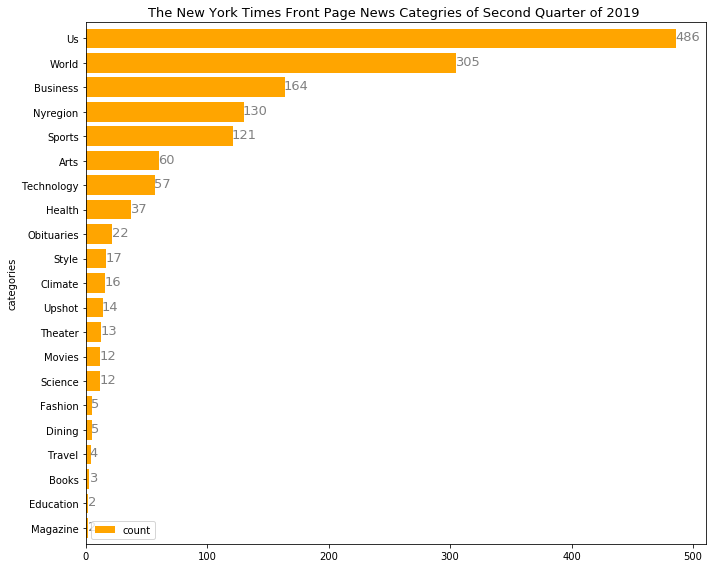

In [226]:
ax=df1.sort_values('count').plot(kind='barh',x='categories',y='count',figsize=(10,8),color='orange',width=0.8);
ax.set_alpha(0.5)
ax.set_title("The New York Times Front Page News Categries of Second Quarter of 2019 ", fontsize=13);
for i in ax.patches:
    if i.get_width()>3:
        ax.text(i.get_width()-.7, i.get_y()+.31, \
                str(round((i.get_width()), 2)), fontsize=13, color='grey')
    else:
        ax.text(i.get_width()+.1, i.get_y()+.31, \
                str(round((i.get_width()), 2)), fontsize=13, color='grey')
plt.tight_layout()
plt.savefig('fpcat.pdf')

In [273]:
us_keywords=['U.S.','Trump','United States','America']

In [287]:
titles=[]
for title in NYT_FP['titles']:
    titles.append(str(title.encode('utf-8')))

In [303]:
keywords=[]
for title in titles:
    if 'U.S'in title:
        keywords.append('yes')
        print(title)
    elif 'Trump'in title:
        keywords.append('yes')
        print(title)
    elif 'United States' in title:
        keywords.append('yes')
        print(title)
    elif 'America' in title:
        keywords.append('yes')
        print(title)
    else:
        keywords.append('no')
len(keywords)

b'Migration Surge From Central America Was Spurred, in Part, by Mexican Policies'
b'Trump, Putin and a Possible \xe2\x80\x98Red-Line Moment\xe2\x80\x99 in Venezuela'
b'China Purchases Could Undercut Trump\xe2\x80\x99s Larger Trade Goal'
b'Trump Retreats on Health Care After McConnell Warns It Won\xe2\x80\x99t Happen'
b'Trump Lashes Out Again at Puerto Rico, Bewildering the Island'
b'Bald Eagles, Symbol of America, Are Dumping Trash on the Seattle Suburbs'
b'Malware Arrest Exposes Security Gaps at Trump\xe2\x80\x99s Mar-a-Lago Club'
b'Trump\xe2\x80\x99s Takeover of the Republican Party Is Almost Complete'
b'If Trump Can Legally Block Critics on Twitter, Your Local Politician May Do It, Too'
b'Short of Workers, U.S. Builders and Farmers Crave More Immigrants'
b'Trump Says He Wants Herman Cain, Former Pizza Executive, for Fed Board'
b'Finding Biden in Familiar Fix, President Trump Adds a Jab'
b'\xe2\x80\x98Epic\xe2\x80\x99 China Trade Deal Near Completion, Trump Says, but Haggling Continu

1498

In [304]:
NYT_FP['US-related']=keywords
NYT_FP

,titles,news_date,category,US-related
0,Lawsuits Lay Bare Sackler Family’s Role in Opi...,2019/04/01,health,no
1,‘Breaches Everywhere’: Flooding Bursts Midwest...,2019/04/01,us,no
2,New York State Budget Deal Brings Congestion P...,2019/04/01,nyregion,no
3,Russia’s Military Mission Creep Advances to a ...,2019/04/01,world,no
4,Joe Biden Scrambles to Stem Crisis After Lucy ...,2019/04/01,us,no
5,Michael Avenatti’s Biggest Case Yet: His Own,2019/04/01,sports,no
6,"The ‘Blue Prince of Montmartre,’ at 87, Still ...",2019/04/01,world,no
7,Italian Minister Pans Hit Song by an Immigrant...,2019/04/01,world,no
8,Elizabeth Warren Loses Finance Director as She...,2019/04/01,us,no
9,Matt Gaetz Is a Congressman Liberals Love to L...,2019/04/01,us,no


In [315]:
NYT_FP['real_categories']=NYT_FP['category']
for cat in NYT_FP['real_categories'] != 'us':
    NYT_FP.loc[NYT_FP['US-related'] == 'yes', 'real_categories'] = 'us-related'
    NYT_FP.loc[NYT_FP['US-related'] == 'no', 'real_categories'] = 'other'


In [317]:
NYT_FP.loc[NYT_FP['category'] == 'us', 'real_categories'] = 'us'

In [331]:
NYT_FP.loc[NYT_FP['category'] == 'nyregion', 'real_categories'] = 'us'

In [332]:
NYT_FP

,titles,news_date,category,US-related,real_categories
0,Lawsuits Lay Bare Sackler Family’s Role in Opi...,2019/04/01,health,no,other
1,‘Breaches Everywhere’: Flooding Bursts Midwest...,2019/04/01,us,no,us
2,New York State Budget Deal Brings Congestion P...,2019/04/01,nyregion,no,us
3,Russia’s Military Mission Creep Advances to a ...,2019/04/01,world,no,other
4,Joe Biden Scrambles to Stem Crisis After Lucy ...,2019/04/01,us,no,us
5,Michael Avenatti’s Biggest Case Yet: His Own,2019/04/01,sports,no,other
6,"The ‘Blue Prince of Montmartre,’ at 87, Still ...",2019/04/01,world,no,other
7,Italian Minister Pans Hit Song by an Immigrant...,2019/04/01,world,no,other
8,Elizabeth Warren Loses Finance Director as She...,2019/04/01,us,no,us
9,Matt Gaetz Is a Congressman Liberals Love to L...,2019/04/01,us,no,us


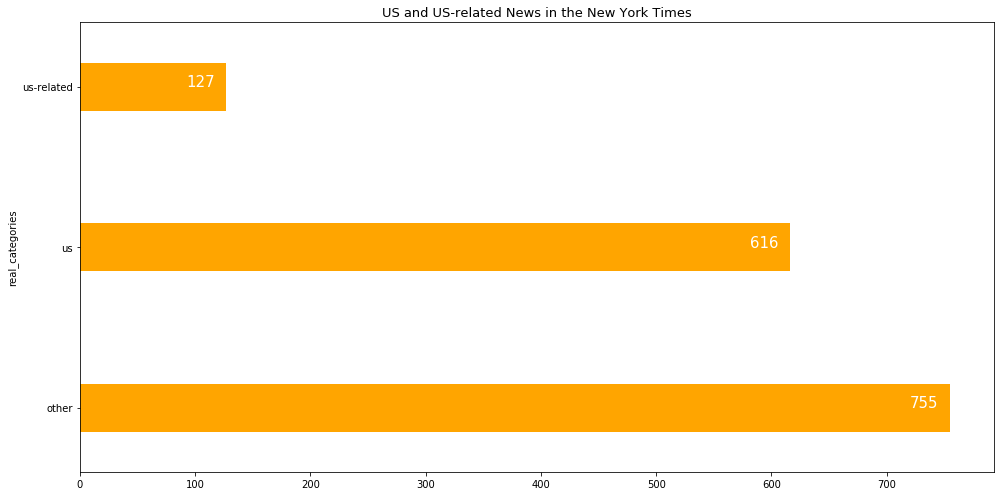

In [389]:
ax=NYT_FP.groupby('real_categories')['real_categories'].count().plot(kind='barh',figsize=(14,7),color='orange',width=0.3)
ax.set_title("US and US-related News in the New York Times", fontsize=13)
for i in ax.patches:
    ax.text(i.get_width()-35, i.get_y()+.15, \
            str(i.get_width()), fontsize=15, color='white')
plt.tight_layout()
plt.savefig('us-related.pdf')

In [381]:
df2=pd.DataFrame(NYT_FP.groupby('real_categories')['real_categories'].count())

In [341]:
df2['percentage']=round(100*(df2['real_categories']/df2['real_categories'].sum()),2)